# Assignment 6: Implement SGD for linear regression

In [3]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from numpy import random

In [4]:
#Making the dataframe
from sklearn.datasets import load_boston
import pandas as pd
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)

In [5]:
load_boston().feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Description of Data Set

In [6]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
Y=load_boston().target
X=load_boston().data

In [8]:
#Splitting the dataframe
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [9]:
# standardizing the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
train_data=pd.DataFrame(X_train)
train_data['price']=Y_train

In [11]:
import numpy as np
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [12]:
# shape of test and train data matxis
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## SGD Regresser of sklearn

In [13]:
# SkLearn SGD classifier
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

## Ploting the chart of predicted values Vs actual values for SGDRegresser of sklearn

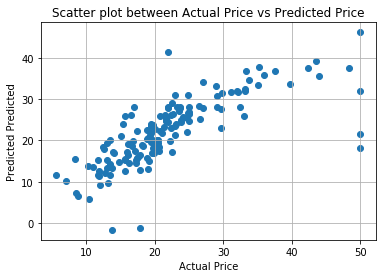

In [15]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Price')
plt.ylabel('Predicted Predicted')
plt.title('Scatter plot between Actual Price vs Predicted Price')
plt.show()

In [16]:
# SkLearn SGD classifier predicted weight matrix
version_sklearn=sgd.coef_
version_sklearn

array([-0.67359293,  0.23269199, -0.03729534,  1.19307993, -0.49363931,
        3.65806385, -0.50892885, -1.35112707,  0.57128713, -0.47701001,
       -2.15216847,  0.81039221, -3.00992236])

In [17]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error :',mean_squared_error(Y_test, sgd.predict(X_test)))

Mean Squared Error : 34.25874599260796


## Implementing own version of sklearn SGDRegresser

In [18]:
# implemented SGD Classifier
def own_implementation(train_data,n_iterations=10000,k=25,learning_rate=0.0001):
    w_latest=np.zeros(shape=(1,train_data.shape[1]-1))
    b_latest=0
    j=1
    
    while(j<=n_iterations):
        w_previous=w_latest
        b_previous=b_latest
        
        w_tem=np.zeros(shape=(1,train_data.shape[1]-1))
        b_tem=0
        
        tem=train_data.sample(k)
        
        Y=np.array(tem['price'])
        X=np.array(tem.drop('price',axis=1))
        
        for i in range(k):
            w_tem+=X[i]*(Y[i]-(np.dot(w_previous,X[i])+b_previous))*(-2/k)
            b_tem+=(Y[i]-(np.dot(w_previous,X[i])+b_previous))*(-2/k)
        w_latest=w_previous-learning_rate*w_tem
        b_latest=b_previous-learning_rate*b_tem
        if(w_previous==w_latest).all():
            break
        j=j+1
    
    return w_latest,b_latest

In [19]:
w,b=own_implementation(train_data)

In [20]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [21]:
y_pred=predict(X_test,w,b)
y_pred

array([34.00483379, 14.89174261, 14.0344714 , 18.24473785, 18.0252266 ,
       15.75112249, 20.09825627, 22.46244208, 24.76157208, 30.87634545,
       15.87246643, 20.37251332, 23.41478185,  9.03911106, 28.50561124,
       19.4403641 , 36.02510546, 25.41329933, 23.48268188, 11.9681924 ,
       14.16228765, 16.21973407, 22.31527515, 21.20314943, 21.52185452,
       14.37572179, 10.0757581 , 17.70827217, 15.19209732, 24.78898523,
       10.98199971, 29.45233775, 23.98467228, 18.32689782, 13.30310434,
       12.35744701, 16.93015834, 14.36521306, 10.46257413, 21.88935132,
       33.49075039, 15.11642618, 23.81634407, 11.91040921, 21.8832118 ,
       29.41858213,  4.80411991, 15.00616635, 12.63898763, 28.81836787,
        4.12479087, 23.84216762, 25.49031069, 21.5076073 , 21.30061562,
       11.38874161, 12.20974286, 10.89732364, 17.13129762, 17.55855317,
       23.66451936,  8.33437576, 30.41503323, 20.73545146, 19.45767497,
        8.88064948, 15.48390606, 17.81280586, 33.19827853, 17.30

## Ploting a chart of predicted values Vs actual values of own SGD Implementation

In [22]:
def scatter_plot(test_data,y_pred):
    #scatter plot
    plt.scatter(test_data,y_pred)
    plt.grid()
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()

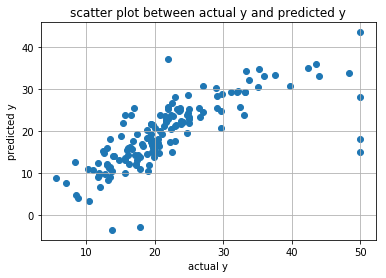

In [23]:
scatter_plot(Y_test,y_pred)

In [24]:
# weight vector obtained from impemented SGD Classifier
version_own_implementation=w
version_own_implementation

array([[-0.68071991,  0.43446345, -0.43178907,  1.20089633, -0.28969517,
         3.39381147, -0.3387414 , -1.21489511,  0.21006942, -0.44309464,
        -2.00136828,  0.7046373 , -2.8190108 ]])

In [25]:
# Errors in implemeted model
print(mean_squared_error(Y_test,y_pred))

39.4775548741213


##  In a tabular format, comparing the weights obtained from own implementation with the weights obtained after applying sklearn's SGDRegresser.

In [26]:
from prettytable import PrettyTable
version_own_implementation.shape=(13,)
numbering =  [1,2,3,4,5,6,7,8,9,10,11,12,13]

ptable = PrettyTable()
ptable.add_column("S.No.",numbering)
ptable.add_column("Variables",load_boston().feature_names)
ptable.add_column("Weights of Custom SGD",version_own_implementation)
ptable.add_column("Weights of sklearns SGD",version_sklearn)

print(ptable)

+-------+-----------+-----------------------+-------------------------+
| S.No. | Variables | Weights of Custom SGD | Weights of sklearns SGD |
+-------+-----------+-----------------------+-------------------------+
|   1   |    CRIM   |  -0.6807199141834008  |   -0.6735929331146994   |
|   2   |     ZN    |  0.43446344617523963  |   0.23269198723485632   |
|   3   |   INDUS   |  -0.4317890721757704  |  -0.037295336604391695  |
|   4   |    CHAS   |   1.2008963282200598  |    1.1930799280938345   |
|   5   |    NOX    |  -0.2896951656630646  |    -0.49363931245008    |
|   6   |     RM    |   3.393811468780039   |    3.6580638480547756   |
|   7   |    AGE    |  -0.33874140067122527 |    -0.508928846140801   |
|   8   |    DIS    |  -1.2148951093213372  |    -1.35112706962313    |
|   9   |    RAD    |  0.21006942257290714  |    0.5712871270799124   |
|   10  |    TAX    |  -0.4430946446479293  |   -0.47701001378487984  |
|   11  |  PTRATIO  |  -2.0013682782356406  |   -2.1521684671523

## Comparing the MSE obtained from custom implementation of SGD Regressor and that of sklearns implementation.

In [27]:
x=PrettyTable()
x.field_names=["Mean Square Error of custom model", "Mean Square Error of sklearns SGD model"]
x.add_row([mean_squared_error(Y_test,y_pred) , mean_squared_error(Y_test, sgd.predict(X_test))])
print(x)

+-----------------------------------+-----------------------------------------+
| Mean Square Error of custom model | Mean Square Error of sklearns SGD model |
+-----------------------------------+-----------------------------------------+
|          39.4775548741213         |            34.25874599260796            |
+-----------------------------------+-----------------------------------------+
